In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.shape

(10841, 13)

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
# check for the null values in the data
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
 ## 3. Drop records with nulls in any of the columns.
df = df.dropna()

In [10]:
df.shape

(9360, 13)

In [11]:
## Drop records with nulls in any of the columns check 
df.isnull().sum ()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [12]:
df = df[df.Size != 'Varies with device']

In [13]:
# 4.1 Size column has sizes in Kb as well as Mb. To analyze, we need to convert these to numeric.
# Extract the numeric value from the column
# multiply the value by 1,000, if size is mentioned in Mb
def MtoK(b):
    if b[len(b) -1: ] == 'M':
        return(float(b[0: len(b) -1 ])*1000)
    elif b[len(b) -1: ] == 'K' or  b[len(b) -1: ] == 'k':
        return(float(b[0: len(b) -1 ]))
    else:
        return b

In [14]:
df.Size = df.Size.apply(MtoK)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7723 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   object 
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   object 
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   object 
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(2), object(11)
memory usage: 844.7+ KB


In [16]:
df.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: Size, Length: 7723, dtype: float64

In [17]:
df = df[df.Size != 'Varies with device']

In [18]:
df.shape

(7723, 13)

In [19]:
# 4.2 Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
#converts to int

df ["Reviews"] = df ['Reviews'].astype ("int64")

In [20]:
df["Reviews"].dtype

dtype('int64')

In [21]:
""" 4.3 Installs field is currently stored as string and has values like 1,000,000+. 
Treat 1,000,000+ as 1,000,000
remove ‘+’, ‘,’ from the field, convert it to integer"""

def remove_char(val):
    return(int(val.replace(',','').replace('+','')))

In [22]:
df.Installs = df.Installs.map (remove_char)

In [23]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

In [24]:
# 4.4 Price field is a string and has $ symbol. Remove ‘$’ sign, 
# and convert it to numeric.

def remove_symbol(val):
    return(float(val.replace("$", "")))

In [25]:
df.Price = df.Price.apply(remove_symbol)

In [26]:
df ["Price"].dtype

dtype('float64')

In [27]:
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7723, dtype: float64

In [28]:
df.shape

(7723, 13)

In [29]:
"""5.1 Sanity checks:
Average rating should be between 1 and 5 as only these values are allowed on the play store. 
Drop the rows that have a value outside this range.
"""

'5.1 Sanity checks:\nAverage rating should be between 1 and 5 as only these values are allowed on the play store. \nDrop the rows that have a value outside this range.\n'

In [30]:
# Way to check
df[(df.Rating <1) | (df.Rating>5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [32]:
#5.2 Reviews should not be more than installs as only those who installed can review the app.

In [33]:
df.loc[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [34]:
df.loc[df.Reviews > df.Installs].describe ()

,Rating,Reviews,Size,Installs,Price
count,6.0,6.000000,6.000000,6.000000,6.000000
mean,5.0,7.666667,15050.000000,4.666667,0.413333
std,0.0,6.947422,8219.914841,4.412105,0.659566
min,5.0,2.000000,4200.000000,1.000000,0.000000
25%,5.0,2.500000,8575.000000,1.000000,0.000000
50%,5.0,5.500000,17500.000000,3.000000,0.000000
75%,5.0,10.000000,19750.000000,8.750000,0.742500
max,5.0,20.000000,25000.000000,10.000000,1.490000


In [35]:
df.loc[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [36]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [37]:
df[['Reviews','Installs']]

,Reviews,Installs
0,159,10000
1,967,500000
2,87510,5000000
3,215644,50000000
4,967,100000
...,...,...
10833,44,1000
10834,7,500
10836,38,5000
10837,4,100


In [38]:
# Created a column to easily identify results for the syntax
df['RAI'] = np.where((df['Reviews'] <= df['Installs']), df['Installs'], np.nan)

In [39]:
df['RAI'].shape

(7723,)

In [40]:
df['RAI'].describe()

count    7.717000e+03
mean     8.430620e+06
std      5.017636e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: RAI, dtype: float64

In [41]:
df = df.dropna()

In [42]:
# Still have 14 columns and need to drop RAI
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'RAI'],
      dtype='object')

In [43]:
# to drop RAI column
df = df.drop(['RAI'], axis = 1)

In [44]:
df.shape

(7717, 13)

In [45]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [46]:
# 5.3 For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [48]:
# To determine the rows with Price above $0
df.loc[df.Price>0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.0,100000,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.0,100000,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
477,Calculator,DATING,2.6,57,6200.0,1000,Paid,6.99,Everyone,Dating,"October 25, 2017",1.1.6,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36000.0,1000000,Paid,0.99,Everyone,Arcade,"June 8, 2018",2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861.0,100,Paid,0.99,Everyone,Personalization,"April 25, 2018",0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.0,1000,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.0,10000,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up


In [49]:
# check to confirm any free app with Price > 0
df[np.logical_and(df['Type'] == 'Free', df['Price'] > 0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [50]:
#Performing univariate analysis: 
#Boxplot for Price
#Are there any outliers? Think about the price of usual apps on Play Store.

{'whiskers': [<matplotlib.lines.Line2D at 0x193d90eb430>,
 'caps': [<matplotlib.lines.Line2D at 0x193d90eb9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x193d90eb160>],
 'medians': [<matplotlib.lines.Line2D at 0x193d90ebf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x193d90f9280>],
 'means': []}

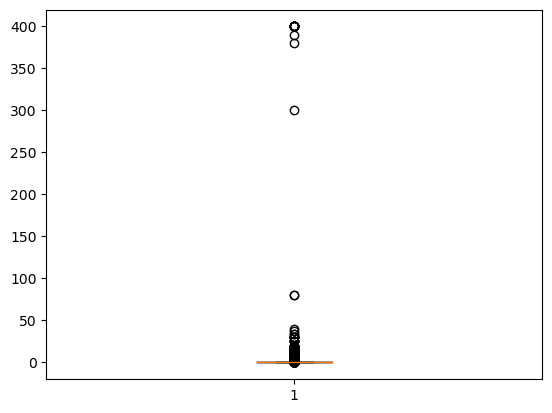

In [51]:
plt.boxplot(df['Price'])
# most app prices are less that $100
# some outlier prices above $200

In [52]:
df['Price'].describe()

count    7717.000000
mean        1.128725
std        17.414784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x193d9120d60>,
 'caps': [<matplotlib.lines.Line2D at 0x193d9131340>,
 'boxes': [<matplotlib.lines.Line2D at 0x193d9120a90>],
 'medians': [<matplotlib.lines.Line2D at 0x193d91318e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x193d9131bb0>],
 'means': []}

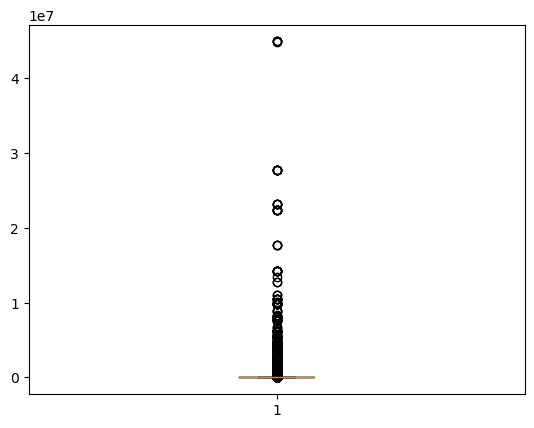

In [53]:
#Boxplot for Reviews
#Are there any apps with very high number of reviews? Do the values seem right?

plt.boxplot(df['Reviews'])

In [54]:
#Histogram for Rating
#How are the ratings distributed? Is it more toward higher ratings?

df['Reviews'].describe()

count    7.717000e+03
mean     2.951275e+05
std      1.864640e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.351000e+03
75%      3.910900e+04
max      4.489389e+07
Name: Reviews, dtype: float64

(array([  17.,   18.,   39.,   72.,  132.,  408.,  781., 1406., 3212.,
        1632.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

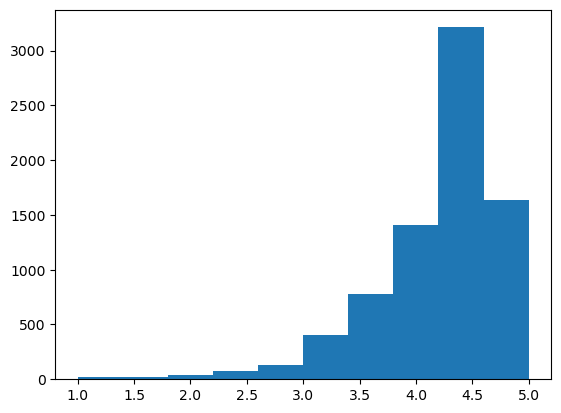

In [55]:
plt.hist(df['Rating'])

(array([3245., 1398.,  991.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([8.500000e+00, 1.000765e+04, 2.000680e+04, 3.000595e+04,
        4.000510e+04, 5.000425e+04, 6.000340e+04, 7.000255e+04,
        8.000170e+04, 9.000085e+04, 1.000000e+05]),
 <BarContainer object of 10 artists>)

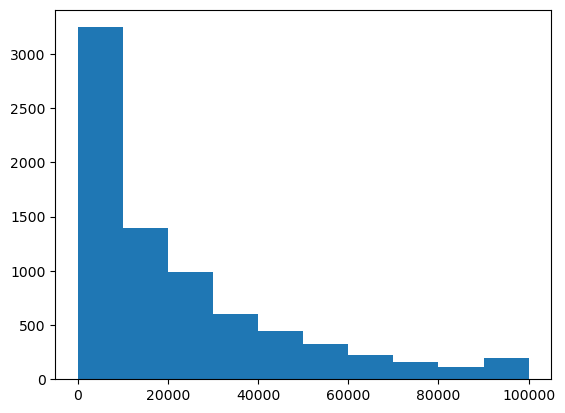

In [56]:
plt.hist(df['Size'])

In [57]:
# To determine the rows with Price above $100 
# for my DF, I assume any app price greater than $100 is too high and should be dropped(outlier)
df.loc[df.Price > 100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [58]:
# Second check and same result
df[df.Price>100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [59]:
df[df.Price>100].shape
# 15 rows with outlier prices 

(15, 13)

In [60]:
#df shape before the drop
df.shape

(7717, 13)

In [61]:
#df shape after the drop
df[df.Price <=100].shape

(7702, 13)

In [70]:
#new df after the dropp
df.shape

(7702, 13)

In [71]:
# df accommodates all the required conditions on Price, Rating Reviews and Insatlls
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7702.000000,7.702000e+03,7702.000000,7.702000e+03,7702.000000
mean,4.173890,2.957011e+05,23004.020709,8.447011e+06,0.368802
std,0.544481,1.866409e+06,23466.178824,5.022383e+07,2.348127
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,1.090000e+02,5300.000000,1.000000e+04,0.000000
50%,4.300000,2.374500e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,3.949125e+04,33000.000000,1.000000e+06,0.000000
max,5.000000,4.489389e+07,100000.000000,1.000000e+09,79.990000


In [73]:
# 

In [74]:
# 6.2 Reviews: Very few apps have very high number of reviews. 
#These are all star apps that don’t help with the analysis and, in fact, will skew it.
#Drop records having more than 2 million reviews.

In [75]:
df['Reviews'].describe()

count    7.702000e+03
mean     2.957011e+05
std      1.866409e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.374500e+03
75%      3.949125e+04
max      4.489389e+07
Name: Reviews, dtype: float64

In [76]:
# rows with Reviews more that 2million
df.loc[df.Reviews > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [77]:
# second check
df[df.Reviews > 2000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
345,Yahoo Mail – Stay Organized,COMMUNICATION,4.3,4187998,16000.0,100000000,Free,0.0,Everyone,Communication,"July 18, 2018",5.29.3,4.4 and up
347,imo free video calls and chat,COMMUNICATION,4.3,4785892,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
366,UC Browser Mini -Tiny Fast Private & Secure,COMMUNICATION,4.4,3648120,3300.0,100000000,Free,0.0,Teen,Communication,"July 18, 2018",11.4.0,4.0 and up
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.0,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11000.0,500000000,Free,0.0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9142,Need for Speed™ No Limits,GAME,4.4,3344300,22000.0,50000000,Free,0.0,Everyone 10+,Racing,"July 24, 2018",2.12.1,4.1 and up
9166,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58000.0,100000000,Free,0.0,Mature 17+,Action,"July 24, 2018",3.2.1c,4.0 and up
10186,Farm Heroes Saga,FAMILY,4.4,7615646,71000.0,100000000,Free,0.0,Everyone,Casual,"August 7, 2018",5.2.6,2.3 and up
10190,Fallout Shelter,FAMILY,4.6,2721923,25000.0,10000000,Free,0.0,Teen,Simulation,"June 11, 2018",1.13.12,4.1 and up


In [78]:
# 219 rows to be dropped
df[df.Reviews > 2000000].shape

(219, 13)

In [79]:
df.shape

(7702, 13)

In [80]:
# new df
df = df[df.Reviews <= 2000000]

In [81]:
df.shape

(7483, 13)

In [82]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7483.000000,7.483000e+03,7483.000000,7.483000e+03,7483.000000
mean,4.165789,7.260651e+04,22027.284177,3.947465e+06,0.379595
std,0.549946,2.123720e+05,22582.977041,2.781831e+07,2.381384
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,9.900000e+01,5100.000000,1.000000e+04,0.000000
50%,4.300000,2.026000e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,3.238600e+04,31000.000000,1.000000e+06,0.000000
max,5.000000,1.986068e+06,100000.000000,1.000000e+09,79.990000


In [83]:
# Installs:  There seems to be some outliers in this field too.
#Apps having very high number of installs should be dropped from the analysis.
#Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
#Decide a threshold as cutoff for outlier and drop records having values more than that

In [84]:
df['Installs'].describe()

count    7.483000e+03
mean     3.947465e+06
std      2.781831e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [85]:
np.arange(0,1,0.05)

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [86]:
# To get the percentiles by 0.05
df['Installs'].quantile(q = np.arange(0,1,0.05))

0.00           5.0
0.05         100.0
0.10        1000.0
0.15        1000.0
0.20        5000.0
0.25       10000.0
0.30       10000.0
0.35       10000.0
0.40       50000.0
0.45      100000.0
0.50      100000.0
0.55      100000.0
0.60      500000.0
0.65     1000000.0
0.70     1000000.0
0.75     1000000.0
0.80     5000000.0
0.85     5000000.0
0.90    10000000.0
0.95    10000000.0
Name: Installs, dtype: float64

In [87]:
df['Installs'].quantile(0.99)

50000000.0

In [88]:
df.shape

(7483, 13)

In [89]:
# Installations above 10,000,000 are outliers and should be dropped 
df[df.Installs > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
225,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,839206,12000.0,50000000,Free,0.0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.0,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.0,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up


In [90]:
# second check
df.loc[df.Installs > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
225,Secure Folder,BUSINESS,3.8,14760,8600.0,50000000,Free,0.0,Everyone,Business,"January 31, 2018",1.1.07.6,7.0 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
346,imo beta free calls and text,COMMUNICATION,4.3,659395,11000.0,100000000,Free,0.0,Everyone,Communication,"June 7, 2018",9.8.000000010492,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10378,BMX Boy,GAME,4.2,839206,12000.0,50000000,Free,0.0,Everyone,Racing,"September 20, 2017",1.16.33,4.1 and up
10408,Shoot Hunter-Gun Killer,GAME,4.3,320334,27000.0,50000000,Free,0.0,Teen,Action,"August 8, 2018",1.1.2,4.1 and up
10429,Talking Tom Bubble Shooter,FAMILY,4.4,687136,54000.0,50000000,Free,0.0,Everyone,Casual,"May 25, 2018",1.5.3.20,4.1 and up
10513,Flight Simulator: Fly Plane 3D,FAMILY,4.0,660613,21000.0,50000000,Free,0.0,Everyone,Simulation,"March 1, 2017",1.32,2.3 and up


In [91]:
#new df without outlier
df[df.Installs <= 10000000].shape

(7307, 13)

In [92]:
df = df[df.Installs <= 10000000]

In [93]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,7307.000000,7.307000e+03,7307.000000,7.307000e+03,7307.000000
mean,4.162899,5.091109e+04,21687.801765,1.716009e+06,0.388738
std,0.555276,1.457407e+05,22460.971012,3.205978e+06,2.409159
min,1.000000,1.000000e+00,8.500000,5.000000e+00,0.000000
25%,4.000000,9.100000e+01,5000.000000,1.000000e+04,0.000000
50%,4.300000,1.749000e+03,14000.000000,1.000000e+05,0.000000
75%,4.500000,2.755850e+04,30000.000000,1.000000e+06,0.000000
max,5.000000,1.736105e+06,100000.000000,1.000000e+07,79.990000


form the plot below, rating does not increase with price


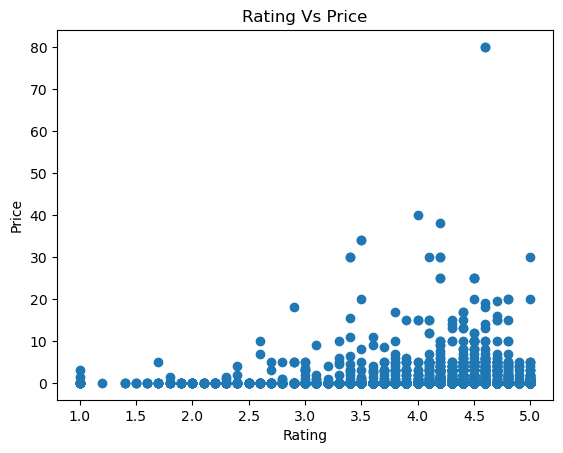

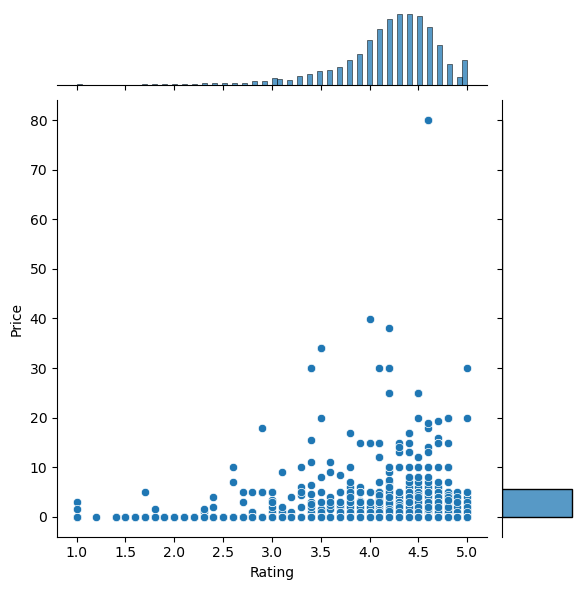

In [97]:
# 7.1 Make scatter plot/joinplot for Rating vs. Price
# What pattern do you observe? Does rating increase with price?

#plt.scatter(x,y)

#x --> Rating
#y --> Price
import warnings
warnings.filterwarnings("ignore")
plt.scatter(df['Rating'], df['Price'])
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Rating Vs Price')
sns.jointplot(df['Rating'], df['Price'])
print('form the plot below, rating does not increase with price')

from the plot, lighter apps have less ratings than the heavier apps and are likely to be rated lower


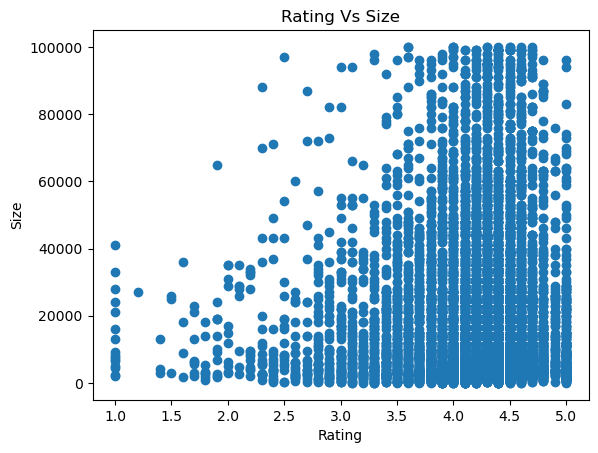

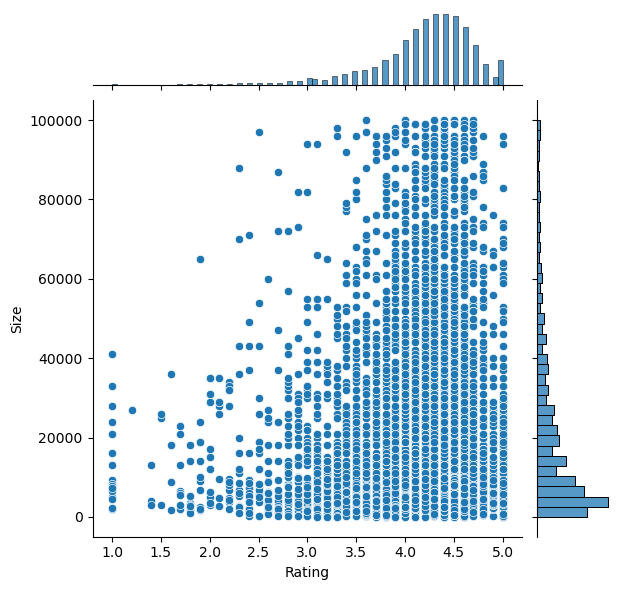

In [98]:
#7.2 Make scatter plot/joinplot for Rating vs. Size
# Are heavier apps rated better?
import warnings
warnings.filterwarnings("ignore")
plt.scatter(df['Rating'], df['Size'])
plt.xlabel('Rating')
plt.ylabel('Size')
plt.title('Rating Vs Size')
sns.jointplot(df['Rating'], df['Size'])
print('from the plot, lighter apps have less ratings than the heavier apps and are likely to be rated lower')

from the plot, apps with the most reviews are rated highly


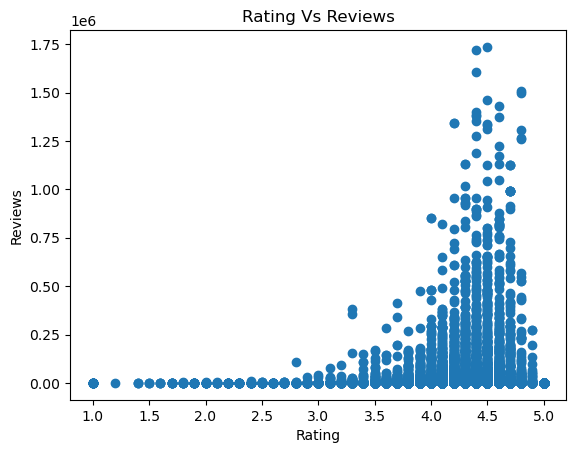

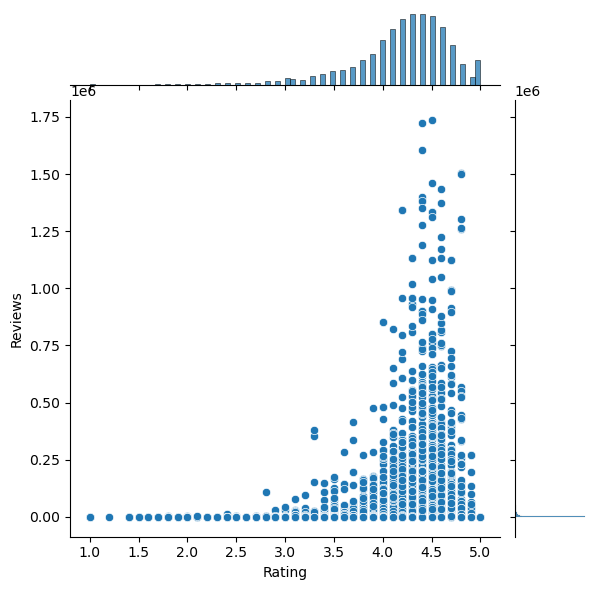

In [99]:
# 7.3 Make scatter plot/joinplot for Rating vs. Reviews
# Does more review mean a better rating always?

#plt.scatter(x,y)

#x --> Rating
#y --> Reviews

plt.scatter(df['Rating'], df['Reviews'])
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.title('Rating Vs Reviews')
sns.jointplot(df['Rating'], df['Reviews'])
print('from the plot, apps with the most reviews are rated highly')

Apps for Teens  Content Rating are generally rated higher than others, while the apps for Everyone show a large variance in rating


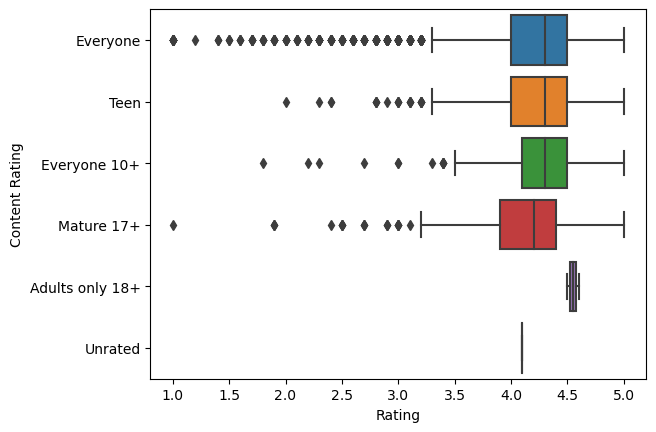

In [100]:
# 7.4 Make boxplot for Rating vs. Content Rating
# Is there any difference in the ratings? Are some types liked better?

sns.boxplot(df['Rating'], df['Content Rating'])
print('Apps for Teens  Content Rating are generally rated higher than others, while the apps for Everyone show a large variance in rating')

Apps for parenting and events show the highest ratings


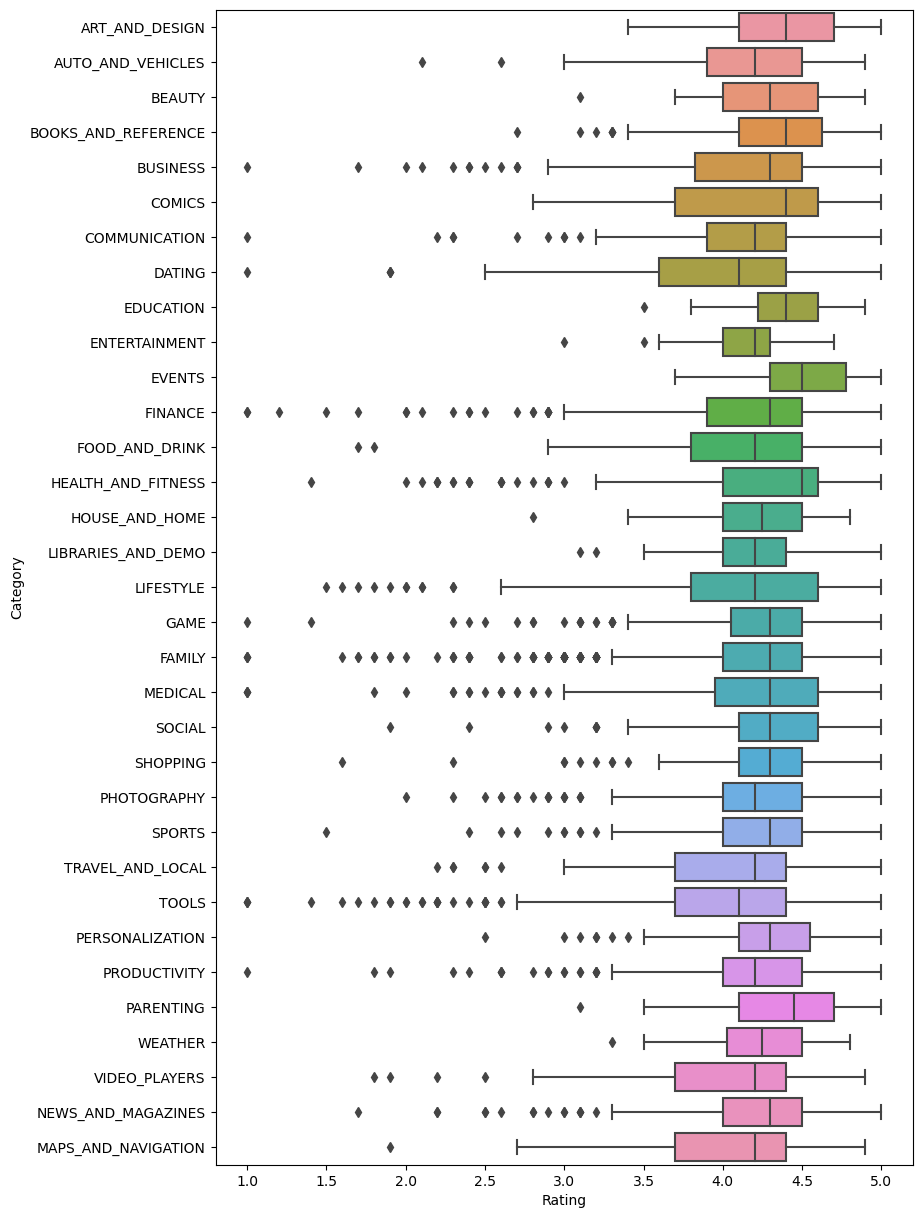

In [101]:
#Make boxplot for Ratings vs. Category
# Which genre has the best ratings?


fig, axis = plt.subplots(figsize=(9, 15))
sns.boxplot(df['Rating'], df['Category'])
print('Apps for parenting and events show the highest ratings')

In [103]:
# 8 For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

inp1 = df.copy().reset_index()

In [104]:
# 8.1  Reviews and Install have some values that are still relatively very high. 
# Before building a linear regression model, you need to reduce the skew. 
# Apply log transformation (np.log1p) to Reviews and Installs.

inp1['Reviews'] = np.log1p(inp1['Reviews'])
inp1['Installs'] = np.log1p(inp1['Installs'])
inp1['Size'] = np.log1p(inp1['Size'])

In [105]:
# 8.2 Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

inp1.drop(columns = ['index', 'App', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1, inplace = True)

In [106]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [107]:
inp1.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,9.852247,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,9.546884,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,11.379520,9.071193,15.424949,Free,0.0,Everyone,Art & Design
3,ART_AND_DESIGN,4.3,6.875232,7.937732,11.512935,Free,0.0,Everyone,Art & Design;Creativity
4,ART_AND_DESIGN,4.4,5.123964,8.630700,10.819798,Free,0.0,Everyone,Art & Design


In [108]:
inp1.shape

(7307, 9)

In [109]:
# 8.3 Get dummy columns for Category, Genres, and Content Rating. 
#This needs to be done as the models do not understand categorical data, and all data should be numeric. 
#Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [110]:
categorical_cols = ['Category', 'Genres', 'Content Rating', 'Type']

inp2 = pd.get_dummies(inp1, columns=categorical_cols, drop_first=True)

In [111]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Paid
0,4.1,5.075174,9.852247,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,3.9,6.875232,9.546884,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,4.7,11.379520,9.071193,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4.3,6.875232,7.937732,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4.4,5.123964,8.630700,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [112]:
# 9 Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [113]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp2, train_size = 0.7, random_state = 32)

In [114]:
df_train.shape, df_test.shape

((5114, 154), (2193, 154))

In [115]:
# 10. Separate the dataframes into X_train, y_train, X_test, and y_test.
y_train = df_train.Rating
X_train = df_train.drop(['Rating'], axis=1)

y_test = df_test.Rating
X_test = df_test.drop(['Rating'], axis=1)

In [116]:
# 11.1 Model building
# Use linear regression as the technique

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [117]:
# 11.2 
# Report the R2 on the train set
from sklearn.metrics import r2_score
y_train_pred= lr.predict(X_train)
r2_score(y_train, y_train_pred)

0.15559171430883934

In [118]:
# 12 Make predictions on test set and report R2.

In [119]:
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)

-828076724540557.6